<img alt="premier league logo" src="img/pl.png" width="220px">

# Soccer Data 
This dataset contains data of every game from the 2018-2019 season in the English Premier League. 


## Context

 ### Objective : analye and explore soccer data to get the most of statistical analyses
 
 - Explore
 - Visualize
 - Analyse   

#### Import Data

   > The data is in a CSV format table  (comma separated values)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

pldata = pd.read_csv("data/soccer_data.csv")

#### Display Dataset

> diplay first 10 rows of data set

In [2]:
pldata.head(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0
5,E0,11/8/18,Watford,Brighton,2,0,H,1,0,H,...,5,0,10,16,8,2,2,2,0,0
6,E0,11/8/18,Wolves,Everton,2,2,D,1,1,D,...,4,5,8,7,3,6,0,1,0,1
7,E0,12/8/18,Arsenal,Man City,0,2,A,0,1,A,...,3,8,11,14,2,9,2,2,0,0
8,E0,12/8/18,Liverpool,West Ham,4,0,H,2,0,H,...,8,2,14,9,5,4,1,2,0,0
9,E0,12/8/18,Southampton,Burnley,0,0,D,0,0,D,...,3,6,10,9,8,5,0,1,0,0


> Count line/column

In [3]:
pldata.shape

(380, 23)

> pldata info datatype

In [4]:
pldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

> Columns Helper

-  | Column    | Explanation                                   |
   | --------- | --------------------------------------------- |
   | Div       | Division the game was played in               |                            
   | Date      | The date the game was played                  |
   | HomeTeam  | The home team                                 |
   | AwayTeam  | The away team                                 |
   | FTHG      | Full time home goals                          |
   | FTAG      | Full time away goals                          |
   | FTR       | Full time result                              |
   | HTHG      | Half time home goals                          |
   | HTAG      | Half time away goals                          |
   | HTR       | Half time result                              |
   | Referee   | The referee of the game                       |
   | HS        | Number of shots taken by home team            |
   | AS        | Number of shots taken by away team            |
   | HST       | Number of shots taken by home team on target  |
   | AST       | Number of shots taken by away team on target  |
   | HF        | Number of fouls made by home team             |
   | AF        | Number of fouls made by away team             |
   | HC        | Number of corners taken by home team          |
   | AC        | Number of corners taken by away team          |
   | HY        | Number of yellow cards received by home team  |
   | AY        | Number of yellow cards received by away team  |
   | HR        | Number of red cards received by home team     |
   | AR        | Number of red cards received by away team     |

#### Explore and Manipulate Data

In [5]:
teamsCount = pldata.groupby('AwayTeam').size().count()

print(" >>> Total Teams in Premier league : "+str(teamsCount))

 >>> Total Teams in Premier league : 20


> Add Column "Saison" for each row (we need it later for more stats) 

In [6]:
#instancedData = pldata[pldata['Date'].str.count('(.*?)/(.*?)/2019|(.*?)/(.*?)/19')>0].groupby('Date').count()
from datetime import datetime
import dateutil.parser as parser

instancedData  = pldata
## parse match date and add "saison" column for each match (need it later for stats)
for index, row in instancedData.iterrows():
     parsed_date = parser.parse(row["Date"], dayfirst = True)
     normalDate =  parsed_date.strftime('%d-%m-%Y')
     instancedData.loc[index,'Date'] = normalDate
     instancedData.loc[index, 'year'] = parsed_date.strftime('%Y')
     instancedData.loc[index, 'month'] = parsed_date.strftime('%B')

instancedData


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HC,AC,HY,AY,HR,AR,year,month
0,E0,10-08-2018,Man United,Leicester,2,1,H,1,0,H,...,11,8,2,5,2,1,0,0,2018,August
1,E0,11-08-2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,11,9,7,4,1,1,0,0,2018,August
2,E0,11-08-2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,9,11,5,5,1,2,0,0,2018,August
3,E0,11-08-2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,9,8,2,5,2,1,0,0,2018,August
4,E0,11-08-2018,Newcastle,Tottenham,1,2,A,1,2,A,...,11,12,3,5,2,2,0,0,2018,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,12-05-2019,Liverpool,Wolves,2,0,H,1,0,H,...,3,11,4,1,0,2,0,0,2019,May
376,E0,12-05-2019,Man United,Cardiff,0,2,A,0,1,A,...,9,6,11,2,3,3,0,0,2019,May
377,E0,12-05-2019,Southampton,Huddersfield,1,1,D,1,0,H,...,8,6,4,3,0,1,0,0,2019,May
378,E0,12-05-2019,Tottenham,Everton,2,2,D,1,0,H,...,10,13,7,4,0,2,0,0,2019,May


> create helpers functions

In [7]:

# RULE : (H: 3 points | D : 1 point | A : 0 point)
def assign_pointHome(row):
    result = 0
    if row['FTR'] == "H": 
        result = 3
    elif row['FTR'] == "D": 
        result = 1

    return result

def assign_pointAway(row):
    result = 0
    if row['FTR'] == "A": 
        result = 3
    elif row['FTR'] == "D": 
        result = 1

    return result


## RULE : (Yellow card = 1 point, Double yellow then red card = 3 (disabled due to lack of data) points, Straight red card = 5 points)
def assign_fairplayPointsHome(row):

    yellowCardRatio = 1
    redCardRatio = 5
    points = 0
    
    #YELLOW CARD
    points += (row["HY"] * yellowCardRatio)
    #RED CARD
    points += (row["HR"] * redCardRatio)

    return points

def assign_fairplayPointsAway(row):

    yellowCardRatio = 1
    redCardRatio = 5
    points = 0
    
    #YELLOW CARD
    points += (row["AY"] * yellowCardRatio)
    #RED CARD
    points += (row["AR"] * redCardRatio)

    return points


> Create teams Stats

#### GET TEAMS TOTAL GAOLS IN (HOME/AWAY + SUM)

In [8]:
## GET TEAM TOTAL GOALS (IN HOME / AWAY AND TOTAL)
TotalTeamGoals = instancedData.assign(home_goals = instancedData["FTHG"]).groupby('HomeTeam').agg({'home_goals':sum})\
                .join(instancedData.assign(away_goals = instancedData["FTAG"]).groupby('AwayTeam').agg({'away_goals':sum}))

TotalTeamGoals['total_goals'] =  TotalTeamGoals[['home_goals', 'away_goals']].sum(axis=1)

TotalTeamGoals = TotalTeamGoals.sort_values(by='total_goals', ascending=False).reset_index().rename(columns={"HomeTeam":"team"})

#Display
TotalTeamGoals

,team,home_goals,away_goals,total_goals
0,Man City,57,38,95
1,Liverpool,55,34,89
2,Arsenal,42,31,73
3,Tottenham,34,33,67
4,Man United,33,32,65
5,Chelsea,39,24,63
6,Bournemouth,30,26,56
7,Everton,30,24,54
8,West Ham,32,20,52
9,Watford,26,26,52


#### GET TEAMS TOTAL YELLOW CARDS IN (HOME/AWAY + SUM)

In [9]:
## GET TEAM TOTAL YELLOW CARDS (IN HOME / AWAY AND TOTAL)
TotalTeamYellowCards = instancedData.assign(home_yellow_cards = instancedData["HY"]).groupby('HomeTeam').agg({'home_yellow_cards':sum})\
                 .join(instancedData.assign(away_yellow_cards = instancedData["AY"]).groupby('AwayTeam').agg({'away_yellow_cards':sum}))
TotalTeamYellowCards['total_yellow_cards'] =  TotalTeamYellowCards[['home_yellow_cards', 'away_yellow_cards']].sum(axis=1)

TotalTeamYellowCards = TotalTeamYellowCards.sort_values(by='total_yellow_cards', ascending=False).reset_index().rename(columns={"HomeTeam":"team"})

#Display
TotalTeamYellowCards

,team,home_yellow_cards,away_yellow_cards,total_yellow_cards
0,Watford,38,39,77
1,Burnley,33,42,75
2,Man United,32,41,73
3,Arsenal,40,32,72
4,Wolves,33,39,72
5,Southampton,39,32,71
6,Fulham,34,34,68
7,Cardiff,33,32,65
8,Bournemouth,36,24,60
9,Brighton,30,30,60


#### GET TEAMS TOTAL RED CARDS IN (HOME/AWAY + SUM)

In [10]:
## GET TEAM TOTAL RED CARDS (IN HOME / AWAY AND TOTAL)
TotalTeamRedCards = instancedData.assign(home_red_cards = instancedData["HR"]).groupby('HomeTeam').agg({'home_red_cards':sum})\
                 .join(instancedData.assign(away_red_cards = instancedData["AR"]).groupby('AwayTeam').agg({'away_red_cards':sum}))
TotalTeamRedCards['total_red_cards'] =  TotalTeamRedCards[['home_red_cards', 'away_red_cards']].sum(axis=1)

TotalTeamRedCards = TotalTeamRedCards.sort_values(by='total_red_cards', ascending=False).reset_index().rename(columns={"HomeTeam":"team"})

#Display
TotalTeamRedCards

,team,home_red_cards,away_red_cards,total_red_cards
0,Leicester,2,3,5
1,Brighton,2,2,4
2,Watford,3,1,4
3,Everton,0,4,4
4,Man United,1,3,4
5,Huddersfield,3,1,4
6,Tottenham,0,3,3
7,Southampton,2,1,3
8,Liverpool,1,1,2
9,Newcastle,1,1,2


#### GET TEAMS TOTAL CORNERS IN (HOME/AWAY + SUM)

In [11]:
## GET TEAM TOTAL CORNERS (IN HOME / AWAY AND TOTAL)
TotalTeamCorners = instancedData.assign(home_corners = instancedData["HC"]).groupby('HomeTeam').agg({'home_corners':sum})\
                 .join(instancedData.assign(away_corners = instancedData["AC"]).groupby('AwayTeam').agg({'away_corners':sum}))
TotalTeamCorners['total_corners'] =  TotalTeamCorners[['home_corners', 'away_corners']].sum(axis=1)

TotalTeamCorners = TotalTeamCorners.sort_values(by='total_corners', ascending=False).reset_index().rename(columns={"HomeTeam":"team"})

#Display
TotalTeamCorners

,team,home_corners,away_corners,total_corners
0,Man City,143,144,287
1,Liverpool,133,116,249
2,Chelsea,120,95,215
3,Everton,119,96,215
4,Arsenal,128,84,212
5,Leicester,108,102,210
6,Crystal Palace,130,75,205
7,Man United,116,84,200
8,Wolves,109,86,195
9,Tottenham,102,92,194


#### GET TEAMS TOTAL FOULS IN (HOME/AWAY + SUM)

In [12]:
## GET TEAM TOTAL FOULS (IN HOME / AWAY AND TOTAL)
TotalTeamFouls = instancedData.assign(home_fouls = instancedData["HF"]).groupby('HomeTeam').agg({'home_fouls':sum})\
                 .join(instancedData.assign(away_fouls = instancedData["AF"]).groupby('AwayTeam').agg({'away_fouls':sum}))
TotalTeamFouls['total_fouls'] =  TotalTeamFouls[['home_fouls', 'away_fouls']].sum(axis=1)

TotalTeamFouls = TotalTeamFouls.sort_values(by='total_fouls', ascending=False).reset_index().rename(columns={"HomeTeam":"team"})

#Display
TotalTeamFouls

,team,home_fouls,away_fouls,total_fouls
0,Brighton,221,242,463
1,Watford,221,212,433
2,Man United,213,220,433
3,Everton,218,214,432
4,Fulham,199,224,423
5,Newcastle,203,219,422
6,Huddersfield,214,206,420
7,Southampton,219,201,420
8,Arsenal,218,194,412
9,Wolves,198,211,409


#### GET TEAMS TOTAL POINTS IN (HOME/AWAY + SUM)

In [13]:
## GET TEAMS CALCULATE TOTAL POINTS (IN HOME / AWAY AND TOTAL)
totalTeamsPoints = instancedData.assign(home_points = instancedData.apply(assign_pointHome, axis=1),)\
                                        .groupby('HomeTeam').agg({'home_points':sum})\
                                        .join(instancedData.assign(away_points = instancedData.apply(assign_pointAway, axis=1))\
                                        .groupby('AwayTeam').agg({'away_points':sum}))


totalTeamsPoints['total_points'] =  totalTeamsPoints[['home_points', 'away_points']].sum(axis=1)

totalTeamsPoints = totalTeamsPoints.sort_values(by='total_points', ascending=False).reset_index(drop=False).rename(columns={"HomeTeam":"team"})

#Display
totalTeamsPoints

,team,home_points,away_points,total_points
0,Man City,54,44,98
1,Liverpool,53,44,97
2,Chelsea,42,30,72
3,Tottenham,38,33,71
4,Arsenal,45,25,70
5,Man United,36,30,66
6,Wolves,34,23,57
7,Everton,34,20,54
8,West Ham,31,21,52
9,Leicester,27,25,52


#### CALCULATE TEAMS FAIR-PLAY POINTS TABLE
> fair play points calculation using the source bellow : 
> - https://www.mirror.co.uk/sport/football/news/premier-league-fair-play-table-24154454

In [14]:
teamsFairPlaysPoints = instancedData.assign(home_fairplay_points = instancedData.apply(assign_fairplayPointsHome, axis=1),)\
                                        .groupby('HomeTeam').agg({'home_fairplay_points':sum})\
                                        .join(instancedData.assign(away_fairplay_points = instancedData.apply(assign_fairplayPointsAway, axis=1))\
                                        .groupby('AwayTeam').agg({'away_fairplay_points':sum}))


teamsFairPlaysPoints['total_fairplay_points'] =  teamsFairPlaysPoints[['home_fairplay_points', 'away_fairplay_points']].sum(axis=1)

teamsFairPlaysPoints = teamsFairPlaysPoints.sort_values(by='total_fairplay_points', ascending=True).reset_index(drop=False).rename(columns={"HomeTeam":"team"})

#Display
teamsFairPlaysPoints

,team,home_fairplay_points,away_fairplay_points,total_fairplay_points
0,Liverpool,18,29,47
1,Chelsea,20,29,49
2,Man City,17,32,49
3,West Ham,28,36,64
4,Bournemouth,41,24,65
5,Newcastle,30,37,67
6,Crystal Palace,30,38,68
7,Cardiff,33,37,70
8,Tottenham,20,51,71
9,Huddersfield,42,33,75


#### COMBINED TEAMS STATS INTO SINGLE DATAFRAME

In [15]:
from functools import reduce

combinedTotalTeamStats = [totalTeamsPoints, TotalTeamGoals,  TotalTeamCorners, TotalTeamYellowCards, TotalTeamRedCards, TotalTeamFouls, teamsFairPlaysPoints]
TeamStatsData = reduce(lambda left,right: pd.merge(left,right,on='team'), combinedTotalTeamStats)


TeamStatsData

,team,home_points,away_points,total_points,home_goals,away_goals,total_goals,home_corners,away_corners,total_corners,...,total_yellow_cards,home_red_cards,away_red_cards,total_red_cards,home_fouls,away_fouls,total_fouls,home_fairplay_points,away_fairplay_points,total_fairplay_points
0,Man City,54,44,98,57,38,95,143,144,287,...,44,0,1,1,162,166,328,17,32,49
1,Liverpool,53,44,97,55,34,89,133,116,249,...,37,1,1,2,149,166,315,18,29,47
2,Chelsea,42,30,72,39,24,63,120,95,215,...,49,0,0,0,154,185,339,20,29,49
3,Tottenham,38,33,71,34,33,67,102,92,194,...,56,0,3,3,174,201,375,20,51,71
4,Arsenal,45,25,70,42,31,73,128,84,212,...,72,0,2,2,218,194,412,40,42,82
5,Man United,36,30,66,33,32,65,116,84,200,...,73,1,3,4,213,220,433,37,56,93
6,Wolves,34,23,57,28,19,47,109,86,195,...,72,0,1,1,198,211,409,33,44,77
7,Everton,34,20,54,30,24,54,119,96,215,...,55,0,4,4,218,214,432,24,51,75
8,West Ham,31,21,52,32,20,52,108,79,187,...,59,0,1,1,165,166,331,28,36,64
9,Leicester,27,25,52,24,27,51,108,102,210,...,57,2,3,5,184,167,351,43,39,82


#### Analyse Data (Objective / Questions)
> (Different questions scenarios)

 * What team commits the most fouls ?

In [16]:

teamMostFouls = TeamStatsData[['team','total_fouls']][TeamStatsData['total_fouls'] == TeamStatsData['total_fouls'].max()]

print(" >>> The most team commits fouls in premier league saison 2018-2019 :")
teamMostFouls

 >>> The most team commits fouls in premier league saison 2018-2019 :


,team,total_fouls
16,Brighton,463


 * Who is the most fairplay team  ? 

In [17]:

teamMostFairplay = TeamStatsData[['team','total_fairplay_points']][TeamStatsData['total_fairplay_points'] == TeamStatsData['total_fairplay_points'].min()]

print(" >>> The best team has a fairplay in premier league saison 2018-2019 :")
teamMostFairplay

 >>> The best team has a fairplay in premier league saison 2018-2019 :


,team,total_fairplay_points
1,Liverpool,47


 * Who is the champion of premier league saison 2018-2019  ? 

In [18]:

champion = TeamStatsData[['team','total_points']][TeamStatsData['total_points'] == TeamStatsData['total_points'].max()]

print(" >>> The champion of premier league saison 2018-2019 :")
champion

 >>> The champion of premier league saison 2018-2019 :


,team,total_points
0,Man City,98


 * Who is the most assigned Referee of premier league matches in saison 2018-2019  ? 

In [19]:
ref = pldata['Referee'].value_counts().idxmax()

print(" >>> The most assigned referee of premier league saison 2018-2019 :  "+ref+" ")

 >>> The most assigned referee of premier league saison 2018-2019 :  A Taylor 


#### Visualize Data

 * visualize goals ratio by month of premier league saison 2018-2019  ? 

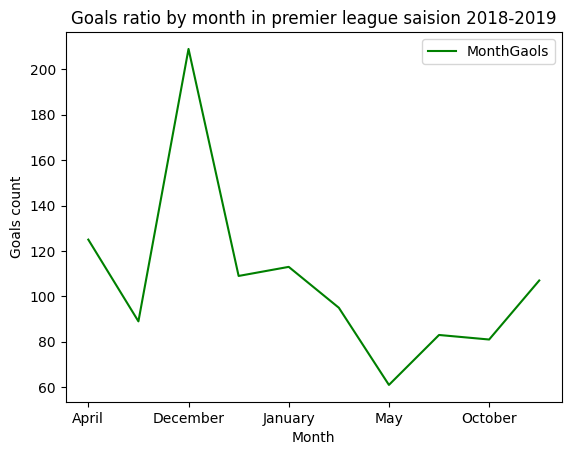

In [20]:
def sumGaols(row):

    return row["FTHG"]+row["FTAG"]
    

monthGoals = instancedData.assign(MonthGaols = instancedData.apply(sumGaols, axis=1),)\
                          .groupby('month').agg({'MonthGaols':sum})\
                          .sort_values(by='month', ascending=True)

monthGoals.plot(color='g', label="ss")
plt.xlabel('Month')
plt.ylabel('Goals count')
plt.title('Goals ratio by month in premier league saision 2018-2019');


 * visualize the premier league champion path towards the title saison 2018-2019  ? 

<BarContainer object of 3 artists>

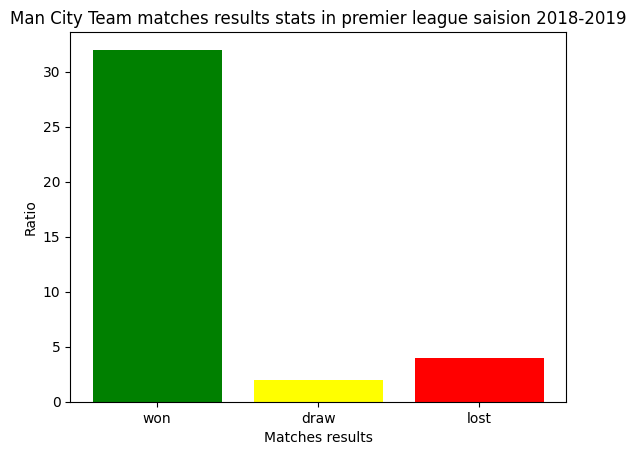

In [21]:
# Ignore pandas code warnings 
#pd.set_option('mode.chained_assignment', None)


championTeam = str(champion["team"][0])
championTeamPath = instancedData.loc[(instancedData['HomeTeam'] == championTeam) | (instancedData['AwayTeam'] == championTeam)].reset_index(drop=True)

def getChampionMathRes(row):
    if(row["HomeTeam"] == championTeam):
        if(row["FTR"] == "H"):
            return "won"
        elif(row["FTR"] == "A"):
            return "lost"
        else:
            return "draw"
    elif(row["AwayTeam"] == championTeam):
        if(row["FTR"] == "A"):
            return "won"
        elif(row["FTR"] == "H"):
            return "lost"
        else:
            return "draw"


for index, row in championTeamPath.iterrows():
     championTeamPath.loc[index, 'match_res'] = getChampionMathRes(row)

teamResStats = championTeamPath.groupby(['match_res']).size()

plt.xlabel("Matches results")
plt.ylabel("Ratio")
plt.title(championTeam+ " Team matches results stats in premier league saision 2018-2019");

x = ["won", "draw", "lost"]
h = [teamResStats["won"], teamResStats["draw"], teamResStats["lost"]]
c = ['green', 'yellow', 'red']
 #bar plot
plt.bar(x, height = h, color = c)
 

 * visualize the teams qualificated for UEFA competions  ? 

In [22]:

statsQualification = TeamStatsData.loc[0:6, ['team', 'total_points']]

def getQualification(place):
    if(place<=3):
        return "Champions League"
    else:
        return "Europa League"

for index, row in statsQualification.iterrows():
     statsQualification.loc[index, 'qualification'] = getQualification(index)

statsQualification[["team","qualification"]]

,team,qualification
0,Man City,Champions League
1,Liverpool,Champions League
2,Chelsea,Champions League
3,Tottenham,Champions League
4,Arsenal,Europa League
5,Man United,Europa League
6,Wolves,Europa League


* pie chart of top 5 teams goals

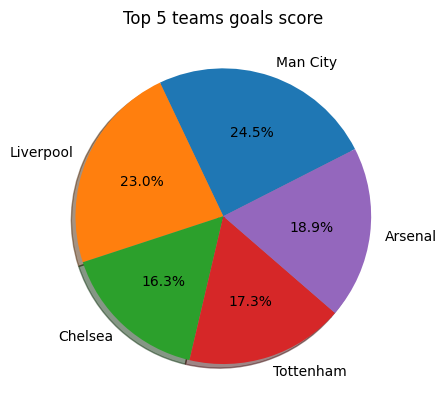

In [23]:

top5 = TeamStatsData.head(5)[["team","total_goals"]]

teams = []
teamsGoals = []
totG = 0
for index, row in top5.iterrows():
     teams.append(row["team"])
     teamsGoals.append(row["total_goals"])
     totG += row["total_goals"]

fig1, ax1 = plt.subplots()
ax1.pie(teamsGoals,  labels=tuple(teams), autopct='%1.1f%%',
        shadow=True, startangle=totG)

plt.title("Top 5 teams goals score")

plt.show()


* pie chart of the top 5 Referee assigned for premier league matches 

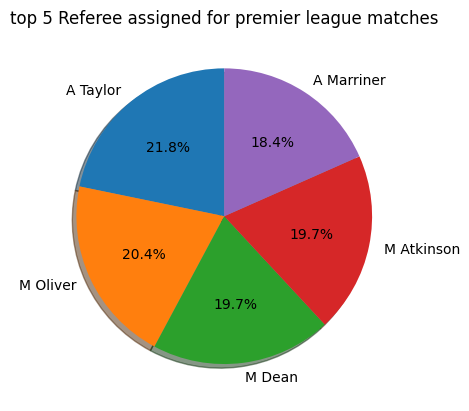

In [24]:
refs = pldata["Referee"].value_counts().head(5).rename_axis('referee').to_frame('counts')

referees = []
matches = []
for referee, row in refs.iterrows():
        referees.append(referee)
        matches.append(row["counts"])

fig1, ax1 = plt.subplots()
ax1.pie(matches,  labels=tuple(referees), autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title("top 5 Referee assigned for premier league matches")

plt.show()


>> A Taylor is the most assigned refreer for premier league matches